1. Deep Learning Requires a lot of Data.

In [17]:
import os

In [18]:
!mkdir -p ~/.kaggle

In [19]:
!mv kaggle.json ~/.kaggle/

In [20]:
!chmod 600 ~/.kaggle/kaggle.json

In [21]:
!kaggle datasets list

ref                                                               title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  -------------------------------------------------  -----------  --------------------------  -------------  ---------  ---------------  
rakeshkapilavai/extrovert-vs-introvert-behavior-data              Extrovert vs. Introvert Behavior Data                    15392  2025-05-21 04:26:52.443000           9048        207  1.0              
adilshamim8/social-media-addiction-vs-relationships               Students' Social Media Addiction                          7851  2025-05-10 14:38:02.713000          12568        188  1.0              
bismasajjad/global-ai-job-market-and-salary-trends-2025           Global AI Job Market & Salary Trends 2025               529004  2025-06-01 07:20:49.537000           2507         44  0.941176

In [22]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:06<00:00, 200MB/s]
100% 1.06G/1.06G [00:06<00:00, 176MB/s]


In [23]:
!unzip /content/dogs-vs-cats.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/train/dogs/dog.4419.jpg  
  inflating: /content/train/dogs/dog.442.jpg  
  inflating: /content/train/dogs/dog.4420.jpg  
  inflating: /content/train/dogs/dog.4421.jpg  
  inflating: /content/train/dogs/dog.4422.jpg  
  inflating: /content/train/dogs/dog.4424.jpg  
  inflating: /content/train/dogs/dog.4425.jpg  
  inflating: /content/train/dogs/dog.4426.jpg  
  inflating: /content/train/dogs/dog.4427.jpg  
  inflating: /content/train/dogs/dog.4431.jpg  
  inflating: /content/train/dogs/dog.4433.jpg  
  inflating: /content/train/dogs/dog.4436.jpg  
  inflating: /content/train/dogs/dog.4438.jpg  
  inflating: /content/train/dogs/dog.4439.jpg  
  inflating: /content/train/dogs/dog.444.jpg  
  inflating: /content/train/dogs/dog.4440.jpg  
  inflating: /content/train/dogs/dog.4441.jpg  
  inflating: /content/train/dogs/dog.4442.jpg  
  inflating: /content/train/dogs/dog.4443.jpg  
  inflating: /content/train/dogs/dog.44

In [24]:
!pip install tensorflow numpy matplotlib keras pandas

In [25]:
import matplotlib.pyplot as plt
from PIL import Image
import random
import cv2
import tensorflow as tf
from tensorflow.keras import layers,models
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from keras.utils import plot_model
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,auc
import seaborn as sns
import os

In [26]:
cat_directory_path='/content/dogs_vs_cats/train/cats'
dog_directory_path='/content/dogs_vs_cats/train/dogs'

Now lets Count the number of Images are present in this Directory

In [27]:
len(os.listdir(cat_directory_path))

10000

In [28]:
len(os.listdir(dog_directory_path))

10000

We can do Visualization here like PieChart, things but here we focus more on building things form scratch

Loading Some of the Image

We can Use CV2 or Numpy or PIL Image

In [29]:
cat_image='/content/dogs_vs_cats/train/cats/cat.0.jpg'
dog_image='/content/dogs_vs_cats/train/dogs/dog.0.jpg'
img1=cv2.imread(cat_image)
img2=cv2.imread(dog_image)

array([[[ 87, 164, 203],
        [ 87, 164, 203],
        [ 88, 165, 204],
        ...,
        [122, 201, 240],
        [121, 200, 239],
        [120, 199, 238]],

       [[ 87, 164, 203],
        [ 87, 164, 203],
        [ 88, 165, 204],
        ...,
        [123, 202, 241],
        [122, 201, 240],
        [120, 199, 238]],

       [[ 87, 164, 203],
        [ 87, 164, 203],
        [ 88, 165, 204],
        ...,
        [123, 202, 241],
        [122, 201, 240],
        [121, 200, 239]],

       ...,

       [[ 55, 122, 153],
        [ 55, 122, 153],
        [ 55, 122, 153],
        ...,
        [  0,   2,   2],
        [  0,   2,   2],
        [  0,   2,   2]],

       [[ 54, 121, 152],
        [ 54, 121, 152],
        [ 54, 121, 152],
        ...,
        [  0,   2,   2],
        [  0,   2,   2],
        [  0,   2,   2]],

       [[ 53, 120, 151],
        [ 53, 120, 151],
        [ 53, 120, 151],
        ...,
        [  0,   1,   1],
        [  0,   1,   1],
        [  0,   1,   1]]], dtype=uint8)
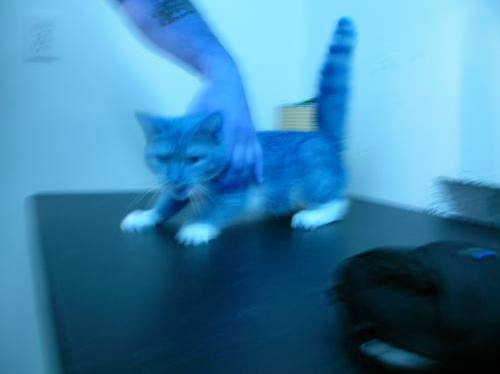

In [30]:
img1

array([[[124, 113, 115],
        [127, 116, 118],
        [130, 117, 119],
        ...,
        [141, 131, 131],
        [139, 131, 131],
        [139, 131, 131]],

       [[125, 114, 116],
        [127, 116, 118],
        [130, 117, 119],
        ...,
        [143, 133, 133],
        [141, 133, 133],
        [141, 133, 133]],

       [[126, 115, 117],
        [128, 117, 119],
        [131, 118, 120],
        ...,
        [145, 135, 135],
        [143, 135, 135],
        [143, 135, 135]],

       ...,

       [[ 77,  73,  68],
        [ 81,  77,  72],
        [ 83,  79,  74],
        ...,
        [ 85,  83,  73],
        [ 84,  82,  72],
        [ 83,  81,  71]],

       [[ 75,  71,  66],
        [ 77,  73,  68],
        [ 77,  73,  68],
        ...,
        [ 77,  75,  65],
        [ 77,  75,  65],
        [ 78,  76,  66]],

       [[ 74,  70,  65],
        [ 75,  71,  66],
        [ 74,  70,  65],
        ...,
        [ 76,  74,  64],
        [ 76,  74,  64],
        [ 76,  74,  64]]], dtype=uint8)
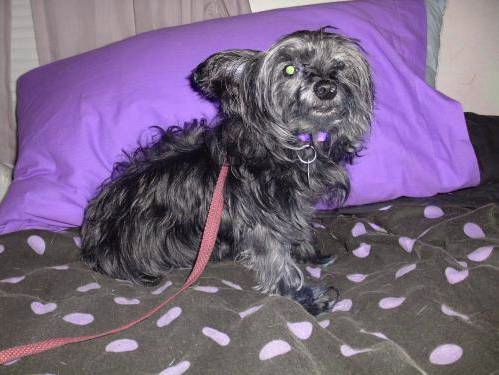

In [31]:
img2

Here Every Image are in Different Shape but it has same RGB Format means 3 channels , so this is one of the things which we need to keep in mind while building cnn model, where we want to resize image to a single fixed shape , becuase then you can create kernel accordingly.

# Building The Model

In [32]:
base_dir='/content/dogs_vs_cats/train'

train_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)
#80% of the belongs to Training data and 20% of them belongs to validation data
#Validation is needful only if we don't hav etest dataset but humare pass test_dataset bhi hai
#Isliye we will try not to use validation_split but ye spne pe hai

Ab Batch create krenge Regarding Training dataset and Regarding Validation dataset

In [33]:
#When we go to the documentation Page
#Like humare ek main folder hai , uske andar multiple folder hai with the class name, and uske andar aapke images hai
#Like this is our Folder Architecture but it is not necessary ki humesha issi format me rahe,sometime it could be in datafram format too,so that's when we came to use


# flow_from_dataframe

In [34]:
#If you have data Inside Datframe then You can use this flow_from_dataframe
# Link-https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

# flow_from_directory

In [35]:
#If you have data Inside Directory then You could have use thsi flow_from_directory
# Link-https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [36]:
#Using 20% of data for validation
train_generator=train_datagen.flow_from_directory(
    base_dir,
    target_size=(150,150),  #Resizing Image to 150x150
    batch_size=20,
    class_mode='binary',    #Since we use binary_crossentropy loss, we need binary labels
    subset='training')      #Set as Training data

validation_generator=train_datagen.flow_from_directory(
    base_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary',
    subset='validation',
    shuffle=False) #Disable shuffling for Validation data

Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [37]:
#20 Images
#80%-16000 (2 Classes)
#20%-4000  (2 Classes)

In [38]:
#If you want to knwo which belongs to which , like whether 0 belongs to bogs or cats , etc
train_generator.class_indices
# Link-https://datascience.stackexchange.com/questions/31264/in-keras-how-to-get-the-class-indices-or-prediction-labels-for-an-existing-mod

{'cats': 0, 'dogs': 1}

# Continue

In [39]:
model=models.Sequential([
    # Layer-1
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    layers.MaxPooling2D((2,2)),

    # Layer-2
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    # Layer-3
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    # Layer-4
    layers.Conv2D(256,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),

    #yaha MLP me 512 Hidden Units rahega
    layers.Dense(512,activation='relu'),

    #I want to predict whether it belongs to a cat or dog isliye waha 1 rhega based on the probability
    layers.Dense(1,activation='sigmoid')
])
#Number of Filter=Number of Kernels

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,811,969 (25.99 MB)

 Trainable params: 6,811,969 (25.99 MB)

 Non-trainable params: 0 (0.00 B)

#Sigmoid - Binary Classifictaion
#Softmax - Multiclass Classification
#Regression - MSE

Yaha pe 6Milllion Parameter ha dekho dhyan sse

In [40]:
#Learn it like Interview me ye sab cheez phuchta hai liek how it is done basically

In [41]:
 #Famous Interview Question-Isme None kya hota hai

In [42]:
#input Shape=150 150 3
#3 3 3=kernel Shape

#So , n-k+1=(148 148 hoga)
#because we have 32 kerenels isliye yaha pe 148 , 148 , 32 aayega


In [43]:
 #None- Like for a single image Output it is coming as 148,148,32
 #so ,agar we are passing 23,30 image in a batch, us 30 Image ka parameter hona chahiye yaha pe
 #and because batch_size is a parameter which is not fixed, rightnow it is showing as None, but while training the data you will get 20,148,148,32

 #So None is basically the batch size in the given architechture wo aap decide krte ho

#### Formula for Conv2D Parameters:

-Params=$$(fw×fh×in_channels+1)×filters$$


- Where:

    - fw,fhfw​,fh​: filter width & height

    - in_channels: depth of input

    - +1: bias term per filter

    - filters: number of filters

#### 1. First Conv2D Layer

- Input Shape: (150,150,3)
- Number of filters: 32
- Filter Size: (3,3,3)
- Parameters: $$(3 \times 3 \times 3 + 1) \times 32 = 896$$




#### 2. First MaxPooling2D Layer

-   Output Shape: (74, 74, 32)

-  No parameters (just downsampling)

#### 3. Second Conv2D Layer

-    Input Shape: (74, 74, 32)

-    Number of Filters: 64

-   Filter Size: (3, 3, 32)

-    Parameters:$$(3 \times 3 \times 32 + 1 ) \times 64 = 18,496$$

#### 4. Second MaxPooling2D Layer

-   Output Shape: (36, 36, 64)

-  No parameters

#### 5. Third Conv2D Layer

-   Input Shape: (36, 36, 64)

-    Number of Filters: 128
-   Filter Size: (3, 3, 64)
-  Parameters:$$(3 \times 3×64+1)×128=73,856$$

#### 6. Third MaxPooling2D Layer

- Output Shape: (17, 17, 128)

- No parameters

#### 7. Fourth Conv2D Layer

- Input Shape: (17, 17, 128)

-  Number of Filters: 256

- Filter Size: (3, 3, 128)

- Parameters:$$(3×3×128+1)×256=295,168$$

#### 8. Fourth MaxPooling2D Layer

- Output Shape: (7, 7, 256)

- No parameters

#### 9. Flatten Layer

- Input Shape: (7, 7, 256)

-  Output Shape: 12,544

-  No parameters

#### 10. Dense (Fully Connected) Layer

- Input Units: 12,544

-  Output Units: 512

-  Parameters:$$(12,544+1)×512=6,423,040$$


#### 11. Output Dense Layer

- Input Units: 512

- Output Units: 1

- Parameters:$$(512+1)×1=513$$


#### Total Trainable Parameters: 6,811,969

In [44]:
#+1 kisliye kiye?
#harek kernel ke liye ek Bias term hota hai so

In [45]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [47]:
history=model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
)

Epoch 1/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5594 - loss: 0.6763

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


800/800 ━━━━━━━━━━━━━━━━━━━━ 926s 1s/step - accuracy: 0.5594 - loss: 0.6763 - val_accuracy: 0.6787 - val_loss: 0.5940
Epoch 2/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 915s 1s/step - accuracy: 0.6966 - loss: 0.5741 - val_accuracy: 0.7653 - val_loss: 0.4914
Epoch 3/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 917s 1s/step - accuracy: 0.7765 - loss: 0.4696 - val_accuracy: 0.8048 - val_loss: 0.4346
Epoch 4/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 918s 1s/step - accuracy: 0.8196 - loss: 0.3938 - val_accuracy: 0.8150 - val_loss: 0.3998
Epoch 5/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 915s 1s/step - accuracy: 0.8647 - loss: 0.3018 - val_accuracy: 0.8438 - val_loss: 0.3693
Epoch 6/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 924s 1s/step - accuracy: 0.9066 - loss: 0.2269 - val_accuracy: 0.8490 - val_loss: 0.3535
Epoch 7/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 918s 1s/step - accuracy: 0.9371 - loss: 0.1557 - val_accuracy: 0.8465 - val_loss: 0.3997
Epoch 8/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 934s 1s/step - accuracy: 0.9643 - loss: 0.0979 - val_accuracy: 0.853

In [ ]:
#Yaha pe 800 kya hai??
#Humaare pass 16000 images hai, and if i have 20 images per batch then i ahve to train or load the batches 800 time
#16000/20=800

In [51]:
 acc=history.history['accuracy']
 val_acc=history.history['val_accuracy']
 loss=history.history['loss']
 val_loss=history.history['val_loss']

print(acc,val_acc,loss,val_loss)

[0.5994374752044678, 0.7161250114440918, 0.7838749885559082, 0.824999988079071, 0.864062488079071, 0.9006249904632568, 0.9338124990463257, 0.9587500095367432, 0.9694374799728394, 0.9802500009536743] [0.6787499785423279, 0.765250027179718, 0.8047500252723694, 0.8149999976158142, 0.84375, 0.8489999771118164, 0.8464999794960022, 0.8532500267028809, 0.8535000085830688, 0.840749979019165] [0.6549217700958252, 0.5487390160560608, 0.4556838274002075, 0.38200047612190247, 0.30715954303741455, 0.23768198490142822, 0.1635613888502121, 0.10527420789003372, 0.08267656713724136, 0.05499441176652908] [0.5940358638763428, 0.491384893655777, 0.43462124466896057, 0.3998275399208069, 0.36933422088623047, 0.35354724526405334, 0.3996814787387848, 0.5252079367637634, 0.5615756511688232, 0.6180686354637146]


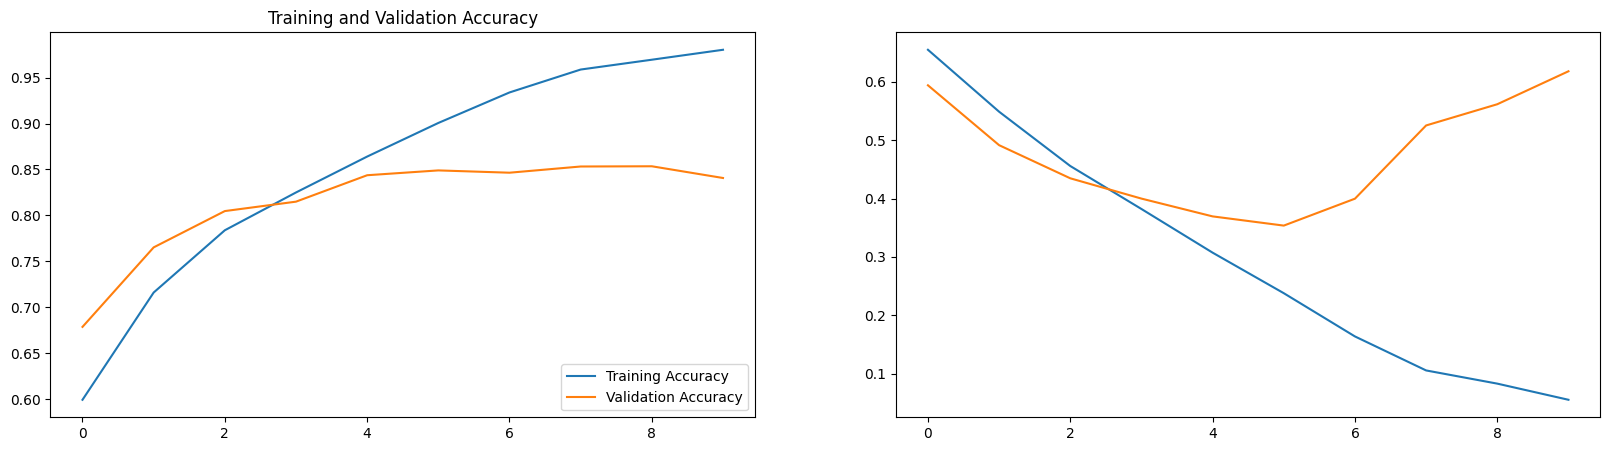

In [53]:
 acc=history.history['accuracy']
 val_acc=history.history['val_accuracy']
 loss=history.history['loss']
 val_loss=history.history['val_loss']

 epochs_range=range(len(acc))

 plt.figure(figsize=(20,5))
 plt.subplot(1,2,1)
 plt.plot(epochs_range,acc,label='Training Accuracy')
 plt.plot(epochs_range,val_acc,label='Validation Accuracy')
 plt.legend(loc='lower right')
 plt.title('Training and Validation Accuracy')

 plt.subplot(1,2,2)
 plt.plot(epochs_range,loss,label='Training Loss')
 plt.plot(epochs_range,val_loss,label='Validation Loss')
 plt.show()

# Testing and Inference

In [55]:
test_datagen=ImageDataGenerator(rescale=1./255)

test_dir='/content/dogs_vs_cats/test'

test_generator=test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150), #Should match the input size of your network
    batch_size=20,         #Can adjust based on your unary constraints
    class_mode='binary',   #we do not need this labels size
    shuffle=False)

Found 5000 images belonging to 2 classes.


In [57]:
#Evaluating the model

test_loss,test_accuracy=model.evaluate(test_generator,steps=len(test_generator))
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Loss: {test_loss}')

250/250 ━━━━━━━━━━━━━━━━━━━━ 82s 327ms/step - accuracy: 0.8501 - loss: 0.5958
Test Accuracy: 0.8417999744415283
Test Loss: 0.659584105014801


# Confusion Matrix

#### Single Image Predictions

In [58]:
probabilities=model.predict(test_generator)
probabilities

250/250 ━━━━━━━━━━━━━━━━━━━━ 80s 321ms/step


array([[1.5576214e-13],
       [3.4892597e-10],
       [1.5124101e-10],
       ...,
       [9.9999762e-01],
       [5.3021538e-01],
       [1.3457812e-01]], dtype=float32)

In [59]:
predicted_classes=(probabilities>0.5).astype(int).squeeze()
predicted_classes

array([0, 0, 0, ..., 1, 1, 0])

In [60]:
test_generator.class_indices

{'cats': 0, 'dogs': 1}

In [61]:
#If you need the actual class labels instead of 0/1, you can map the redicte d classes back to the original labesls
class_labels=list(test_generator.class_indices.keys())
predicted_labels=[class_labels[i] for i in predicted_classes]

In [62]:
#Get the true labels from the test generator
true_classes=test_generator.classes

#Generate the confusion matrix
cm=confusion_matrix(true_classes,predicted_classes)
cm

array([[2137,  363],
       [ 428, 2072]])

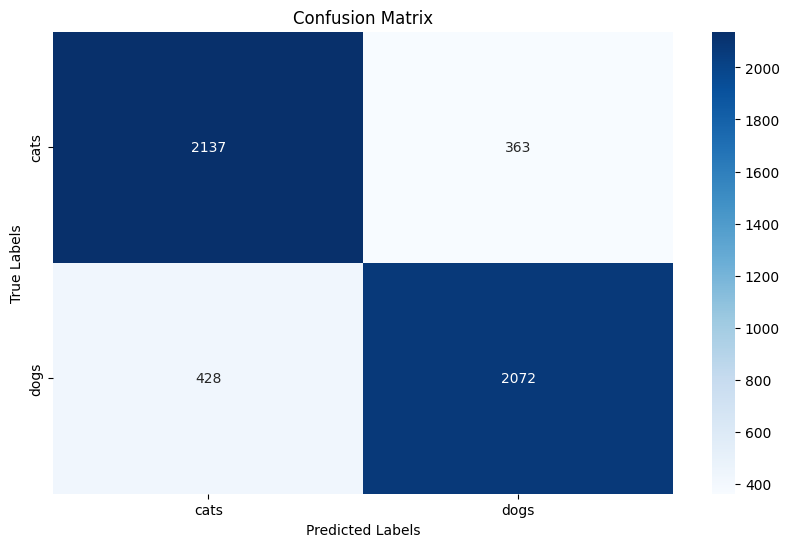

In [64]:
#plotting with seaborn
plt.figure(figsize=(10, 6))  # <- fixed height
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [65]:
test_image='/content/dogs_vs_cats/test/cats/cat.10000.jpg'

img=load_img(test_image,target_size=(150,150))
#Resizing the image

img_array=img_to_array(img)
print(img_array.shape) #Converting to array
img_array=np.expand_dims(img_array,axis=0) #add batch dimension
img_array/=255.
img_array.shape

(150, 150, 3)


(1, 150, 150, 3)

In [66]:
model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


array([[3.4892336e-10]], dtype=float32)

In [67]:
def make_prediction(image_path):
  img=load_img(image_path,target_size=(150,150))
  img_array=img_to_array(img) # Converting to array
  img_array=np.expand_dims(img_array,axis=0) #add batch dimension
  img_array/=255. #Normalizing

  prediction=model.predict(img_array)
  print("Prediction: ", prediction)

  #Original Image
  plt.subplot(1,2,1)
  plt.imshow(img)
  plt.title('Original Image')
  plt.axis('off')

  #Prediction
  plt.subplot(1,2,2)
  if prediction[0][0]>0.5:
    plt.title("Predicted:Dog")
  else:
    plt.title("Predicted:Cat")
  plt.imshow(img)
  plt.axis('off')
  plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Prediction:  [[6.5282664e-05]]


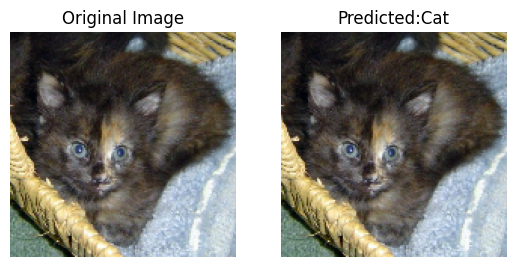

In [74]:
#Load and preprocess the image
image_path='/content/dogs_vs_cats/test/cats/cat.10030.jpg'
make_prediction(image_path)

# Going Further

After training your model , you find that it perfrom either better or worse than expeted . Here are a few steps you can take to imporve the Perfromance.

- Data Augmentation
   - This involves artifically increasing the size and variability of your training dataset by applying random transfromation like roattion , zoom , flip, etc . This helps themodel to generalize better.
   
- Adjust the Model Architechture
   -  You might want to experiment with adding more convolutional layers changing the size of the filters, or adjusting the number of neurons in the dense layers.
 The architecture of your CNN can greatly influence the performance.

 - Hyperparameter Tuning
   -  Experiment with different optimizers, learning rates, and other hyperparametrs to find the best conbination for your model.

- Regularization
   - To prevent overfitting , consider adding droput layers to your model or by uisng L2 regularizations.

-  Transfer Learning

- Model Saving

- Model Deployement

Here is how you could implement data augmention as an example:


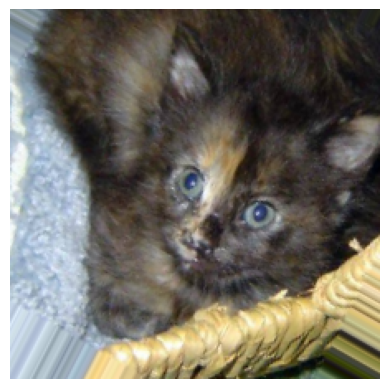

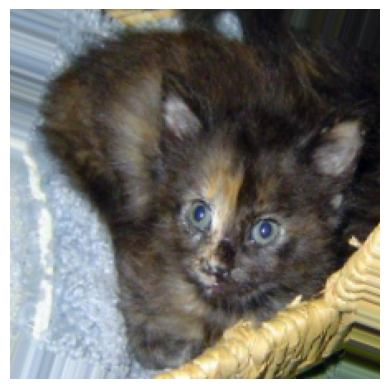

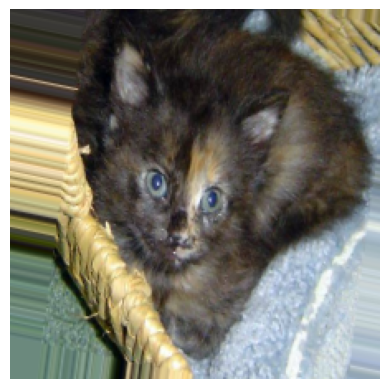

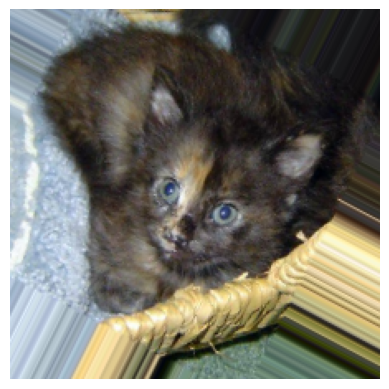

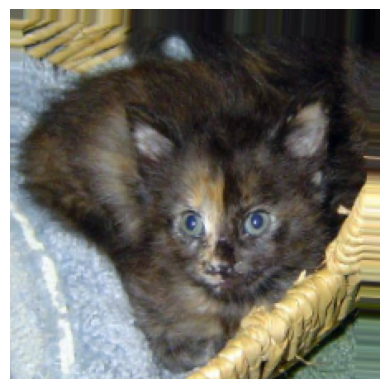

In [75]:
# Create an ImageDataGenerator with augmentation options
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load a sample image
img = tf.keras.utils.load_img('/content/dogs_vs_cats/test/cats/cat.10030.jpg', target_size=(224, 224))
x = tf.keras.utils.img_to_array(img)
x = x.reshape((1,) + x.shape)

# Generate and display 5 augmented images
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.imshow(batch[0].astype('uint8'))
    plt.axis('off')
    plt.show()
    i += 1
    if i >= 5:
        break

In [ ]:
# Kaggle pe jaake 3-4 Madel Banao like Binary , Mutliclass Classification ka Report Banao